In [2]:
!pip install selenium
!pip install chromedriver
import pandas as pd
import os
import glob
import altair as alt
from vega_datasets import data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/MyDrive/Colab Notebooks/DVIZ Project'

alt.data_transformers.enable('default', max_rows=None)

     |████████████████████████████████| 958 kB 26.8 MB/s 
     |████████████████████████████████| 356 kB 51.4 MB/s 
     |████████████████████████████████| 138 kB 50.7 MB/s 
     |████████████████████████████████| 3.6 MB 61.3 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 14.3 MB 29.2 MB/s 


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Mounted at /gdrive
/gdrive/MyDrive/Colab Notebooks/DVIZ Project


DataTransformerRegistry.enable('default')

Create an empty array to contain the dataframes for each file. Get and set a list of excel files. Create a reference dataframe for setting header names.

In [2]:
frames = []
path = os.getcwd()
excel_files = glob.glob(os.path.join(path + '/data/generationplants_excel', "*.xlsx"))
names = pd.read_excel(open(path + '/data/generationplants_excel/2013.xlsx', 'rb'),sheet_name='Page 1 Generation and Fuel Data',header=5)


KeyboardInterrupt: ignored

View the list of excel files.

In [4]:
print(excel_files)

['/gdrive/MyDrive/Colab Notebooks/DVIZ Project/data/generationplants_excel/2012.xlsx', '/gdrive/MyDrive/Colab Notebooks/DVIZ Project/data/generationplants_excel/2011.xlsx', '/gdrive/MyDrive/Colab Notebooks/DVIZ Project/data/generationplants_excel/2013.xlsx', '/gdrive/MyDrive/Colab Notebooks/DVIZ Project/data/generationplants_excel/2014.xlsx', '/gdrive/MyDrive/Colab Notebooks/DVIZ Project/data/generationplants_excel/2015.xlsx', '/gdrive/MyDrive/Colab Notebooks/DVIZ Project/data/generationplants_excel/2016.xlsx', '/gdrive/MyDrive/Colab Notebooks/DVIZ Project/data/generationplants_excel/2017.xlsx', '/gdrive/MyDrive/Colab Notebooks/DVIZ Project/data/generationplants_excel/2018.xlsx', '/gdrive/MyDrive/Colab Notebooks/DVIZ Project/data/generationplants_excel/2019.xlsx', '/gdrive/MyDrive/Colab Notebooks/DVIZ Project/data/generationplants_excel/2020.xlsx']


For each file in excel_files read the generation data and add to frames array. Combine all data frames in the frame array so that we have generation data for 2011-2020.

In [5]:
for f in excel_files:
    df = pd.read_excel(open(f, 'rb'),sheet_name='Page 1 Generation and Fuel Data',header=5)
    for i in range(len(df.columns)):
        df.rename(columns={df.columns[i]: names.columns[i]}, inplace = True)
    frames.append(df)
    
power_df = pd.concat(frames)

Check that the length of the data is as we expect... Good!

In [6]:
len(power_df.columns)

97

Lets see what the data looks like.

In [70]:
power_df['']

NameError: ignored

Next lets get the plant data to get information on type and location

In [8]:
frames = []
path = os.getcwd()
csv_names = pd.read_csv('data/plantcsv/Plants_Coal.csv',header=0)
csv_files = glob.glob(os.path.join(path + '/data/plantcsv/', "*.csv"))
names = pd.read_excel(open('data/generationplants_excel/2013.xlsx', 'rb'),sheet_name='Page 1 Generation and Fuel Data',header=5)
pathlength = len(path)
ranger = pathlength + 22
for f in csv_files:
    df = pd.read_csv(f,header=0)
    val = []
    etype = f[ranger:-4]
    for i in range(len(df.columns)):
        df.rename(columns={df.columns[i]: csv_names.columns[i]}, inplace = True)
    for i in range(len(df)):
        val.append(etype)
    df = df.assign(energytype=val)
    frames.append(df)
    
plant_df = pd.concat(frames, ignore_index=True)
plant_df['energytype'].unique()

array(['Biomass', 'BatteryStorage', 'Coal', 'Geothermal', 'Hydro',
       'NaturalGas', 'Nuclear', 'Petroleum', 'PumpedStorage', 'Solar',
       'Wind', 'Other'], dtype=object)

Now we can merge the generation data with the location and type data for all plants in the U.S.

In [10]:
combineAll = pd.merge(power_df, plant_df.set_index('Code'), left_on='Plant Id', right_index=True)
combineAll
combineAll.to_csv(r'combinedData.csv', index = False)

In [4]:
df_merge = pd.read_csv(r'combinedData.csv')
df_merge = df_merge[df_merge['State_x'] != '32926']
df_merge['energytype'] = df_merge['energytype'].fillna(value='Other')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_merge = df_merge.loc[~(df_merge['Net Generation (Megawatthours)'] == 0)]

In [8]:
sample_df_merge = pd.DataFrame(df_merge, columns= ['Plant Name','Latitude','Longitude', 'energytype','Net Generation (Megawatthours)', 'YEAR'])

In [9]:
sample_df_merge

,Plant Name,Latitude,Longitude,energytype,Net Generation (Megawatthours),YEAR
0,Bankhead Dam,33.458665,-87.356823,Hydro,159180.0,2012.0
1,Bankhead Dam,33.458665,-87.356823,Hydro,129035.0,2011.0
2,Bankhead Dam,33.458665,-87.356823,Hydro,211342.0,2013.0
3,Bankhead Dam,33.458665,-87.356823,Hydro,47391.0,2014.0
4,Bankhead Dam,33.458665,-87.356823,Hydro,25920.0,2015.0
...,...,...,...,...,...,...
117528,New River Clean Energy,37.815770,-81.161930,Biomass,6457.0,2020.0
117529,Cannon Garden Solar,44.244160,-93.269160,Solar,1617.0,2020.0
117530,"Cubera Solar, LLC",35.330022,-78.610091,Solar,3473.0,2020.0
117531,Mtn. Solar 3 CSG,40.280904,-103.619110,Solar,3503.0,2020.0


Let's plot a histogram of the net generation of data  It appears that the distribution of the generation sources by size  linearly correlated in the log-log scale 

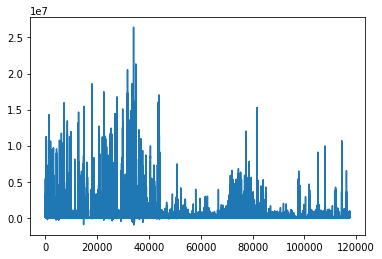

In [6]:
df_merge['Net Generation (Megawatthours)'].plot()

Let's plot a histogram of the net generation of data  It appears that the distribution of the generation sources by size  linearly correlated in the log-log scale

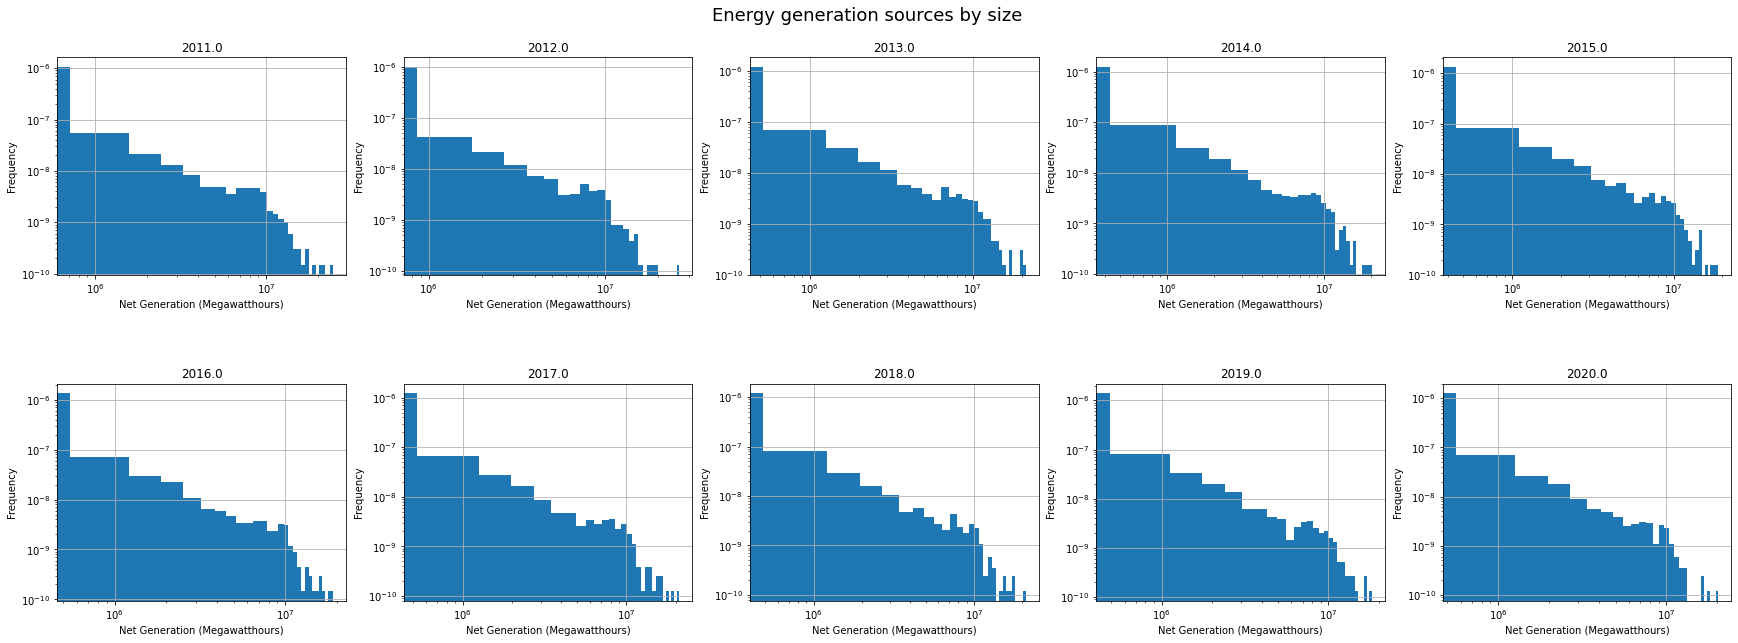

In [7]:
df_merge = df_merge.loc[~(df_merge['Net Generation (Megawatthours)'] == 0)]
df_merge['AER Fuel Type Code'].unique()
years = sorted(df_merge['YEAR'].unique())


fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Energy generation sources by size", fontsize=18, y=0.95)

for i, ax in zip(years, axs.ravel()):
    power_df2 = df_merge[df_merge['YEAR'] == i]
    power_df2['Net Generation (Megawatthours)'].hist(ax=ax, bins=30, density=True)

    ax.set_title(i)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel("Net Generation (Megawatthours)")
    ax.set_ylabel("Frequency")

plt.show()

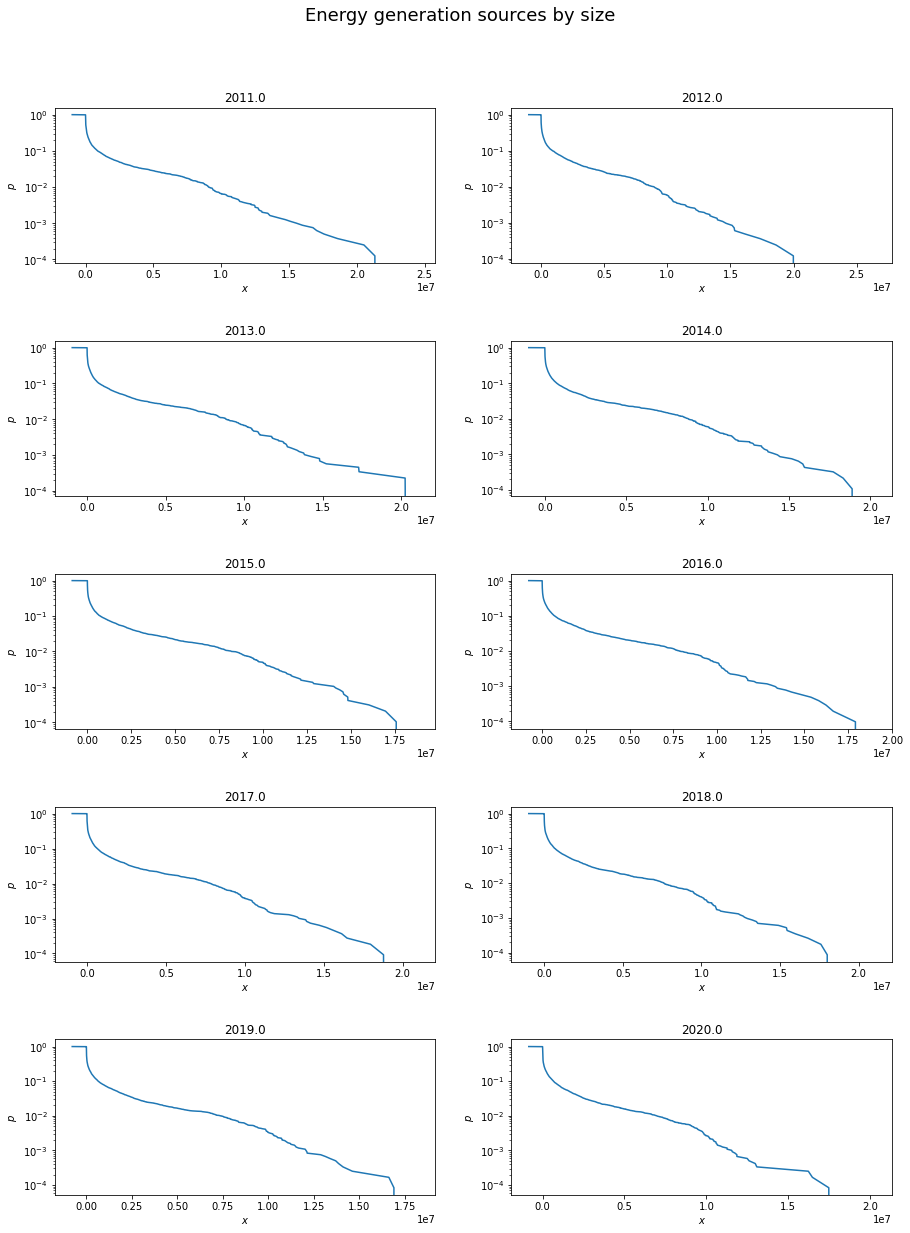

In [8]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Energy generation sources by size", fontsize=18, y=0.95)

for i, ax in zip(years, axs.ravel()):
    power_df2 = df_merge[df_merge['YEAR'] == i]
    Y = np.linspace(1, 0, len(power_df2['Net Generation (Megawatthours)']))
    megawatts_sorted = np.sort(power_df2['Net Generation (Megawatthours)'])
    ax.plot(megawatts_sorted, Y)
    ax.set_title(i)
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p$')

plt.show()

A straight line in semilog scale indicates exponential decay. So it seems like the amount of power (Megawatts per year) a generation source makes follows roughly an exponential distribution meaning that there are many small generation sources and few that generate power in the range of 2 million Megawatts per year. For reference New York city runs on approximately 4M megawatts of power per year

Next lets look at a continuous distribution function of the year generation size for each of the plant types.

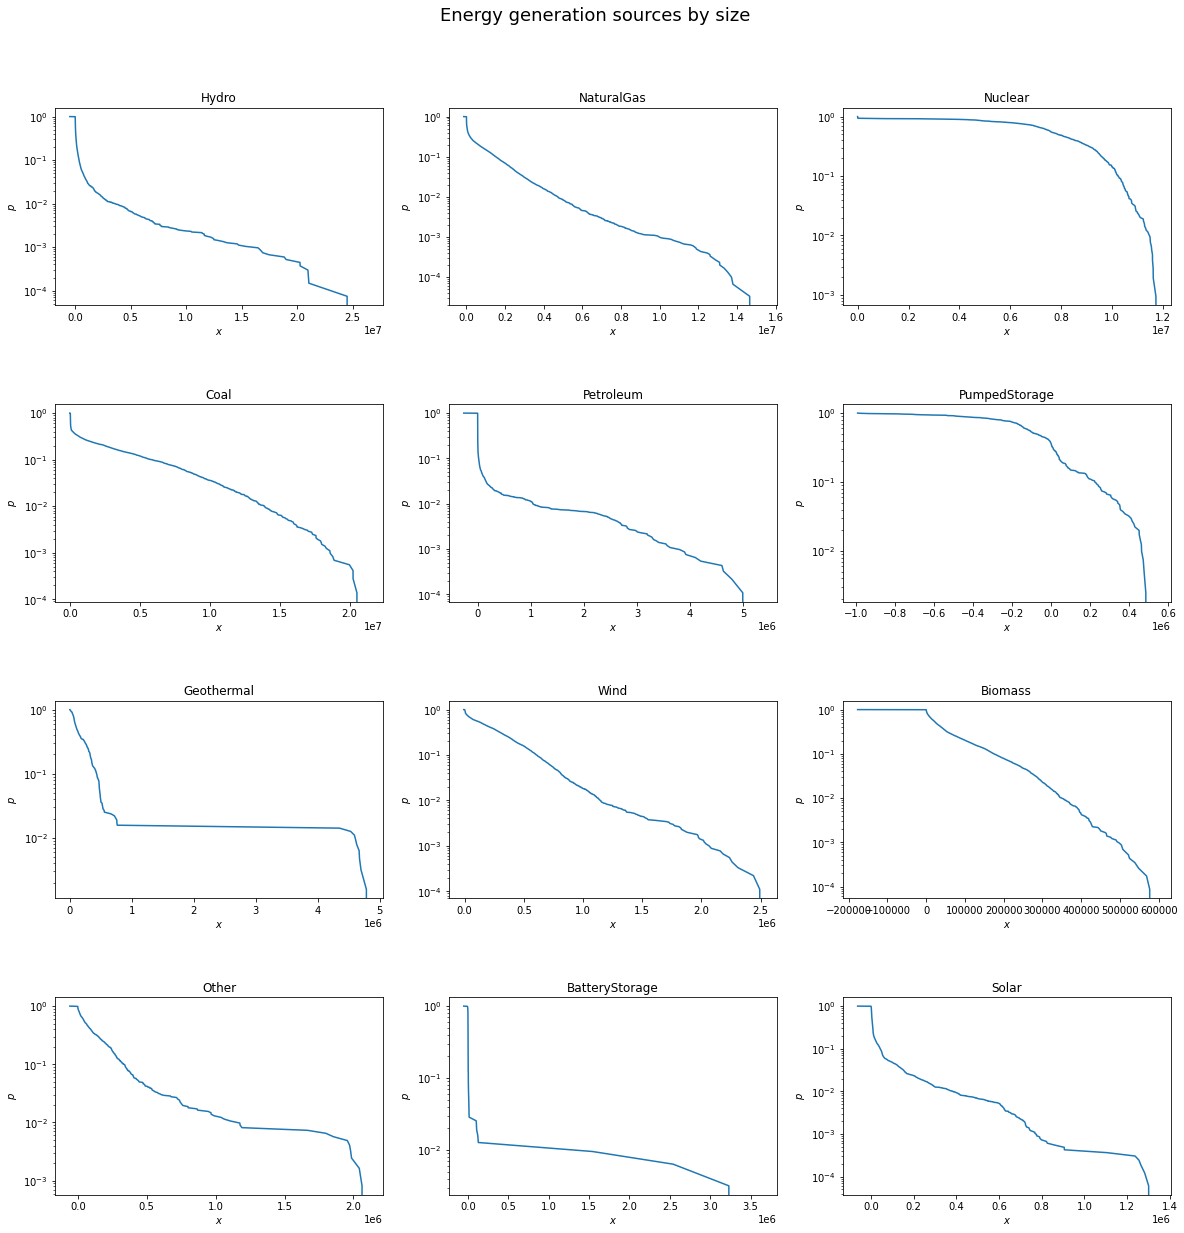

In [9]:
etypes = df_merge['energytype'].unique()
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Energy generation sources by size", fontsize=18, y=0.95)

for i, ax in zip(etypes, axs.ravel()):
    power_df2 = df_merge[df_merge['energytype'] == i]
    Y = np.linspace(1, 0, len(power_df2['Net Generation (Megawatthours)']))
    megawatts_sorted = np.sort(power_df2['Net Generation (Megawatthours)'])
    ax.plot(megawatts_sorted, Y)
    ax.set_title(i)
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p$')

plt.show()

Looks like the largest plants are Hydro, Natural Gas, Nuclear, and Coal

In [10]:
states = alt.topo_feature(data.us_10m.url, feature='states')

# # US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')


# # airport positions on background
points = alt.Chart(df_merge[df_merge['Net Generation (Megawatthours)'] > 1000000]).mark_circle(
    size=15
).encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    tooltip=['Power_Plant_Name', 'City', 'State_x'],
    color='energytype'
)
background + points
# states

Output hidden; open in https://colab.research.google.com to view.

In [11]:
# import geopandas as gpd

gdf = alt.topo_feature('https://raw.githubusercontent.com/deldersveld/topojson/master/countries/us-states/IN-18-indiana-counties.json', feature='cb_2015_indiana_county_20m')
# gdf = gdf[gdf.id=='IN']

dfIN = df_merge[df_merge['State_x']== 'IN']
dfIN.reset_index(inplace=True)

baseIN = alt.Chart(gdf).mark_geoshape(
    fill='lightgray',
    stroke='white'
)

ptsIN = alt.Chart(dfIN).mark_circle(size=25
                                  
    ).encode(
    latitude='Latitude:Q',
    longitude='Longitude:Q',
    tooltip=['Power_Plant_Name', 'City', 'State_x', 'County', 'energytype', 'Source_Desc'],
    color='energytype'
)

baseIN + ptsIN



Output hidden; open in https://colab.research.google.com to view.

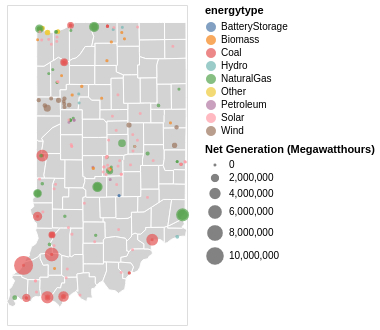

In [72]:
gdf = alt.topo_feature('https://raw.githubusercontent.com/deldersveld/topojson/master/countries/us-states/IN-18-indiana-counties.json', feature='cb_2015_indiana_county_20m')

dfIN = df_merge[(df_merge['State_x'] == 'IN') & (df_merge['YEAR'] == 2020)]

dfIN.reset_index(inplace=True)

baseIN = alt.Chart(gdf).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=180,
    height=320
)

ptsIN = alt.Chart(dfIN).mark_circle(
    ).encode(
    latitude='Latitude:Q',
    longitude='Longitude:Q',
    size=alt.Size('Net Generation (Megawatthours):Q', scale=alt.Scale(zero=False, ), title='Net Generation (Megawatthours)'),
    tooltip=['Power_Plant_Name', 'City', 'State_x', 'County', 'energytype', 'Source_Desc', 'Net Generation (Megawatthours)'],
    color='energytype'
)

baseIN + ptsIN





In [73]:
def outrabubble(i):
  gdf = alt.topo_feature('https://raw.githubusercontent.com/deldersveld/topojson/master/countries/us-states/IN-18-indiana-counties.json', feature='cb_2015_indiana_county_20m')

  dfIN = df_merge[(df_merge['State_x'] == 'IN') & (df_merge['YEAR'] == i)]

  dfIN.reset_index(inplace=True)

  baseIN = alt.Chart(gdf).mark_geoshape(
      fill='lightgray',
      stroke='white'
  ).properties(
    width=180,
    height=320
  )
  etuniq = df_merge['energytype'].unique()
  ptsIN = alt.Chart(dfIN, title= str(i)).mark_circle(
      ).encode(
      latitude='Latitude:Q',
      longitude='Longitude:Q',
      size=alt.Size('Net Generation (Megawatthours):Q', scale=alt.Scale(zero=False, domain=[0,10000000]), title='Net Generation (Megawatthours)'),
      tooltip=['Power_Plant_Name', 'City', 'State_x', 'County', 'energytype', 'Source_Desc', 'Net Generation (Megawatthours)'],
      color=alt.Color('energytype', scale=alt.Scale(domain=etuniq))
  )

  outra = baseIN + ptsIN
  return outra

In [74]:
yrs = renewablesByCounty['year'].unique()
for i in yrs:
      charto = outrabubble(int(i))
      stringer = 'outrabubble' + str(int(i))  + '.png'
      save(charto, stringer, scale_factor=5.0)


In [13]:
states = alt.topo_feature(data.us_10m.url, feature='states')

dfFULL = df_merge[df_merge['Net Generation (Megawatthours)'] > 1000000]

background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=1000,
    height=600
).project('albersUsa')

pts = alt.Chart(dfFULL).mark_circle(
    ).encode(
    latitude='Latitude:Q',
    longitude='Longitude:Q',
    size=alt.Size('Net Generation (Megawatthours):Q', scale=alt.Scale(zero=False), title='Net Generation (Megawatthours)'),
    tooltip=['Power_Plant_Name'],
    color='energytype'
)

background + pts

Output hidden; open in https://colab.research.google.com to view.

This shows the amount of energy generated in Indiana 

In [14]:
def energybytype(dataframe, typelist, typenames, datafilter, viztitle):
    years = sorted(dataframe['YEAR'].unique())
    sumdf = pd.DataFrame({'type': [], 'amount': [], 'year': []})
    
    for i in range(len(typelist)):
        df = dataframe
        if isinstance(typelist[i], str):
            df = df[df[str(datafilter)] == typelist[i]]
        else:
            df = df[df[str(datafilter)].isin(typelist[i])]
        for x in years:
            df1 = df[df['YEAR'] == x]
            amount = sum(df1['Net Generation (Megawatthours)'])
            df2 = pd.DataFrame({'type': [typenames[i]], 'amount': [amount], 'year': [x]})
            sumdf = sumdf.append(df2, ignore_index = True)
    sumdf = sumdf.sort_values(by='amount')

    
    return alt.Chart(sumdf, title=viztitle).mark_area().encode(
        x=alt.X(
            "year",
            title="Year",
            axis=alt.X(tickMinStep=1)
        ),
        y=alt.Y(
            "amount:Q",
            stack="normalize",
            title="Share of net generation"
        ),
        color=alt.Color(
            "type:N",
            legend=alt.Legend(title="Electricity Source")
        ),
        tooltip=['amount:Q', 'type:N', 'year:O']
    ).properties(width=600, height=200).interactive()

In [15]:
typelist1 = df_merge['AER Fuel Type Code'].unique()
typenames1 = df_merge['AER Fuel Type Code'].unique()
datafilter1 = 'AER Fuel Type Code'
dataframe1 = df_merge[df_merge['State_x'] == 'IN']
title = "Indiana Energy Generation by Fuel Code"

energybytype(dataframe1, typelist1, typenames1, datafilter1, title)

alt.Chart(...)

In [16]:
typelist1 = df_merge['AER Fuel Type Code'].unique()
typenames1 = df_merge['AER Fuel Type Code'].unique()
datafilter1 = 'AER Fuel Type Code'
dataframe1 = df_merge
title = "U.S. Energy Generation by Fuel Code"

energybytype(dataframe1, typelist1, typenames1, datafilter1, title)


alt.Chart(...)

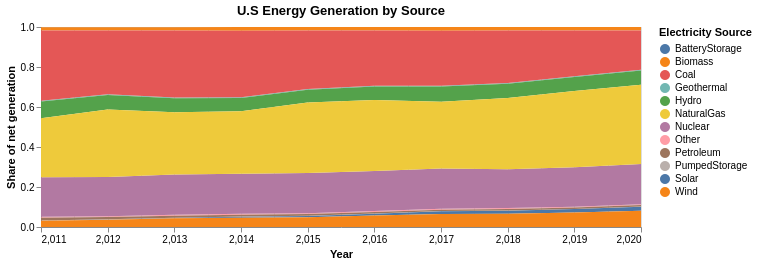

In [52]:
typelist1 = ['BatteryStorage', 'Geothermal', 'Wind', 'Solar', 'PumpedStorage', 'Hydro', 'Nuclear','Coal','NaturalGas','Petroleum','Biomass','Other']
typenames1 = typelist1
datafilter1 = 'energytype'
dataframe1 = df_merge
title1 = "U.S Energy Generation by Source"

energybytype(dataframe1, typelist1, typenames1, datafilter1, title1)

In [18]:
carbonNeutral = ['BatteryStorage', 'Geothermal', 'Wind', 'Solar', 'PumpedStorage', 'Hydro', 'Nuclear']
carbonEmmitor = ['Coal','NaturalGas','Petroleum','Biomass']
other = ['Other']
typelist1 = [carbonNeutral, carbonEmmitor, other]
typenames1 = ['carbonNeutral', 'carbonEmmitor', 'other']
datafilter1 = 'energytype'
dataframe1 = df_merge[df_merge['State_x'] == 'IN']
title1 = "Indiana Energy Generation by Source Type"

energybytype(dataframe1, typelist1, typenames1, datafilter1, title1)

alt.Chart(...)

In [19]:
typelist1 = [carbonNeutral, carbonEmmitor, other]
typenames1 = ['carbonNeutral', 'carbonEmmitor', 'other']
datafilter1 = 'energytype'
dataframe1 = df_merge
title1 = "U.S. Energy Generation by Source Type"

energybytype(dataframe1, typelist1, typenames1, datafilter1, title1)

alt.Chart(...)

In [20]:
def energybystate(dataframe, datafilter):
    states = sorted(dataframe['State_x'].unique())
    years = sorted(dataframe['YEAR'].unique())
    sumdf = pd.DataFrame({'state': [], 'ratio': [], 'year': [], 'totalPercent': [], 'meanlat': [], 'meanlon': []})
    carbonNeutral = ['BatteryStorage', 'Geothermal', 'Wind', 'Solar', 'PumpedStorage', 'Hydro', 'Nuclear']
    for i in years:
        df = dataframe[dataframe['YEAR'] == i]
        df_renew = df[df[str(datafilter)].isin(carbonNeutral)]
        df_full = df
        for x in states:
            dfR = df_renew[df_renew['State_x'] == x]
            dfF = df_full[df_full['State_x'] == x]
            sample1 = dataframe[dataframe['State_x'] == x]
            amountR = sum(dfR['Net Generation (Megawatthours)'])
            amountF = sum(dfF['Net Generation (Megawatthours)'])
            meanlat = np.mean(sample1['Latitude'])
            meanlon = np.mean(sample1['Longitude'])
            if amountF != 0:
                ratio = amountR/amountF
            else:
                ratio = 0
            df2 = pd.DataFrame({'state': [x], 'ratio': [ratio], 'year': [i], 'totalPercent': [amountF], 'meanlat': [meanlat], 'meanlon': [meanlon]})
            sumdf = sumdf.append(df2, ignore_index = True)
    return sumdf

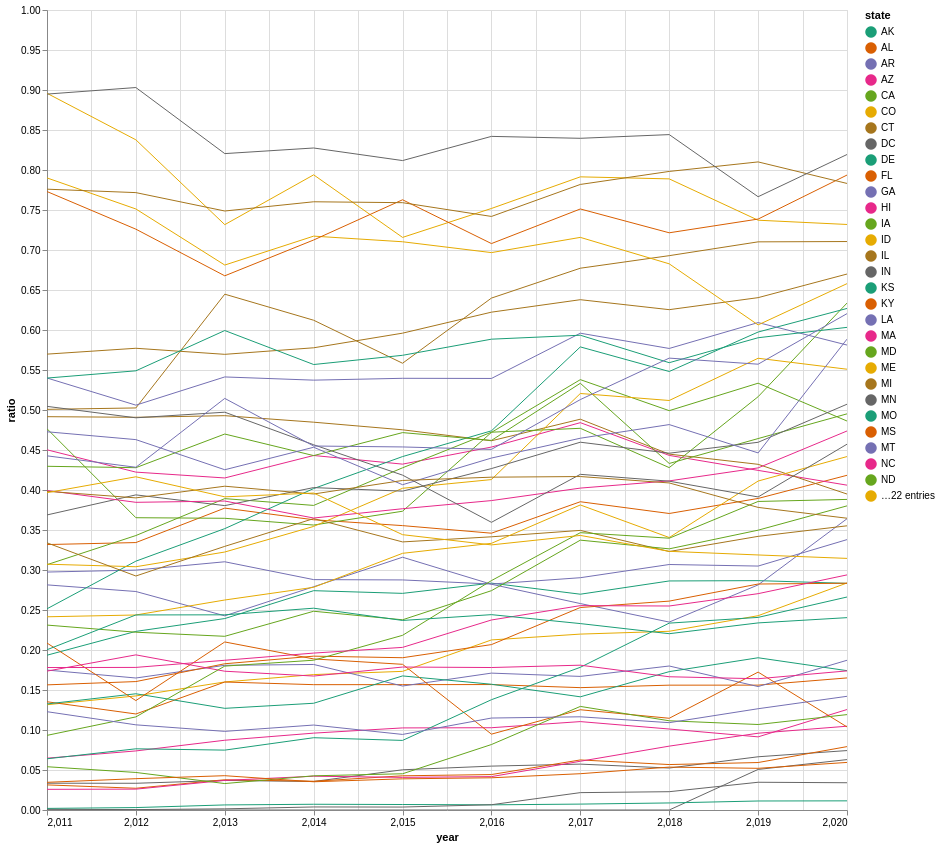

In [85]:
datafilter1 = 'energytype'
dataframe1 = df_merge
renewablesByState=energybystate(dataframe1, datafilter1)


highlight = alt.selection(
    type='single', on='mouseover', fields=['year'], nearest=True)

base = alt.Chart(renewablesByState).encode(
    x=alt.X('year', scale=alt.Scale(domain=[2011, 2020], clamp=True), axis=alt.X(tickMinStep=1)),
    y=alt.Y('ratio:Q', scale=alt.Scale(domain=[0.0, 1.0])),
    color=alt.Color('state', scale=alt.Scale(scheme='dark2')))

points = base.mark_circle().encode(
    opacity=alt.value(0),
    tooltip=[
        alt.Tooltip('year:O', title='Year'),
        alt.Tooltip('ratio:Q', title='Ratio'),
        alt.Tooltip('state', title='State')
    ]).add_selection(highlight)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3)))

(points + lines).properties(width=800, height=800).interactive()



In [22]:
states = alt.topo_feature(data.us_10m.url, feature='states')

ansi = pd.read_csv('https://www2.census.gov/geo/docs/reference/state.txt', sep='|')
ansi.columns = ['id', 'abbr', 'state', 'statens']
ansi = ansi[['id', 'abbr', 'state']]

sourceStates = pd.merge(renewablesByState, ansi.set_index('abbr'), left_on='state', right_index=True)

base = alt.Chart(states, title= "Percentage Carbon-Free Sources by State: 2020" ).mark_geoshape(fill='lightgray', stroke='black', strokeWidth=0.5)

chart = alt.Chart(states).mark_geoshape().encode(
    color=alt.Color('ratio:Q', scale=alt.Scale(domain=[0,1],scheme='viridis'))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(sourceStates, 'id', ['ratio'])
).project(
    type='albersUsa'
).properties(
    width=1000,
    height=600
)

base + chart

alt.LayerChart(...)

In [23]:
sourceStates

,state,state_x,ratio,year,totalPercent,meanlat,meanlon,id,state_y
0,AK,AK,0.193496,2011.0,6.853178e+06,61.365373,-149.235397,2,Alaska
51,AK,AK,0.223270,2012.0,6.928294e+06,61.365373,-149.235397,2,Alaska
102,AK,AK,0.239309,2013.0,6.497079e+06,61.365373,-149.235397,2,Alaska
153,AK,AK,0.274159,2014.0,6.045143e+06,61.365373,-149.235397,2,Alaska
204,AK,AK,0.270796,2015.0,6.270285e+06,61.365373,-149.235397,2,Alaska
...,...,...,...,...,...,...,...,...,...
305,WY,WY,0.114959,2016.0,4.664974e+07,42.755527,-107.221116,56,Wyoming
356,WY,WY,0.116497,2017.0,4.673337e+07,42.755527,-107.221116,56,Wyoming
407,WY,WY,0.109177,2018.0,4.610587e+07,42.755527,-107.221116,56,Wyoming
458,WY,WY,0.126594,2019.0,4.214566e+07,42.755527,-107.221116,56,Wyoming


In [24]:
def energybycounty(dataframe, datafilter):
    df_county = dataframe.groupby(['State_x', 'County']).size().reset_index(name='Freq')
    years = sorted(dataframe['YEAR'].unique())
    sumdf = pd.DataFrame({'state': [],'county': [], 'ratio': [], 'year': []})
    carbonNeutral = ['BatteryStorage', 'Geothermal', 'Wind', 'Solar', 'PumpedStorage', 'Hydro', 'Nuclear']
    for i in years:
        df = dataframe[dataframe['YEAR'] == i]
        df_renew = df[df[str(datafilter)].isin(carbonNeutral)]
        df_full = df
        for x in range(len(df_county)):
            df_county.iloc[1,1]
            dfR = df_renew[(df_renew['State_x'] == df_county.iloc[x,0]) & (df_renew['County'] == df_county.iloc[x,1])]
            dfF = df_full[(df_full['State_x'] == df_county.iloc[x,0]) & (df_full['County'] == df_county.iloc[x,1])]
            amountR = sum(dfR['Net Generation (Megawatthours)'])
            amountF = sum(dfF['Net Generation (Megawatthours)'])
            if amountF != 0:
                ratio = amountR/amountF
            else:
                ratio = 0
            df2 = pd.DataFrame({'state': [df_county.iloc[x,0]], 'county': [df_county.iloc[x,1]], 'ratio': [ratio], 'year': [i]})
            sumdf = sumdf.append(df2, ignore_index = True)
    return sumdf

    

In [25]:
ansi = pd.read_csv('https://www2.census.gov/geo/docs/reference/codes/national_county.txt', sep=',')
ansi.columns = ['State','State ANSI','County ANSI','County Name','ANSI Cl']
ansi = ansi[['State','State ANSI','County ANSI','County Name']]
ansi.sort_values('County ANSI')

,State,State ANSI,County ANSI,County Name
0,AL,1,1,Autauga County
2131,OK,40,1,Adair County
320,FL,12,1,Alachua County
319,DC,11,1,District of Columbia
316,DE,10,1,Kent County
...,...,...,...,...
2949,VA,51,800,Suffolk city
2950,VA,51,810,Virginia Beach city
2951,VA,51,820,Waynesboro city
2952,VA,51,830,Williamsburg city


In [26]:
def energybycounty(dataframe, datafilter):
    counties = alt.topo_feature(data.us_10m.url, feature='counties')

    ansi = pd.read_csv('https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_and_county_fips_master.csv', sep=',')
    ansi.columns = ['fips','name','state']
    ansi = ansi[['fips','name','state']]

    df_county = dataframe.groupby(['State_x', 'County']).size().reset_index(name='Freq')
    print(df_county)
    years = sorted(dataframe['YEAR'].unique())
    sumdf = pd.DataFrame({
        'state': [],
        'county': [], 
        'ratio': [], 
        'non-carbon': [], 
        'allsources': [], 
        'year': []})
    carbonNeutral = ['BatteryStorage', 'Geothermal', 'Wind', 'Solar', 'PumpedStorage', 'Hydro', 'Nuclear']
    for i in years:
        df = dataframe[dataframe['YEAR'] == i]
        df_renew = df[df[str(datafilter)].isin(carbonNeutral)]
        df_full = df
        for x in range(len(df_county)):
            df_county.iloc[1,1]
            dfR = df_renew[(df_renew['State_x'] == df_county.iloc[x,0]) & (df_renew['County'] == df_county.iloc[x,1])]
            dfF = df_full[(df_full['State_x'] == df_county.iloc[x,0]) & (df_full['County'] == df_county.iloc[x,1])]
            amountR = sum(dfR['Net Generation (Megawatthours)'])
            amountF = sum(dfF['Net Generation (Megawatthours)'])
            if amountF != 0:
                ratio = amountR/amountF
            else:
                ratio = 0
            if ratio < 0:
                ratio = 0
            elif ratio > 1:
                ratio = 1
            df2 = pd.DataFrame({
                'state': [df_county.iloc[x,0]], 
                'county': [df_county.iloc[x,1]], 
                'ratio': [ratio], 
                'non-carbon': [amountR], 
                'allsources': [amountF], 
                'year': [int(i)]})
            sumdf = sumdf.append(df2, ignore_index = True)

    states = sumdf['state'].unique()
    df_counties = pd.DataFrame({'fips':[],'countyFIPS':[],'State': [],'Sudo County':[]})
    for x in states:
      dfs = sumdf[sumdf['state'] == x]
      counties = dfs['county'].unique() 
      for i in counties:
          dif = ansi[(ansi['name'].str.contains(i, na=False)) & (ansi['state'] == x)]
          if len(dif) != 0:
              df2 = pd.DataFrame({
                              'fips': [int(dif.iloc[0,0])], 
                              'countyFIPS': [dif.iloc[0,1]],
                              'State': [dif.iloc[0,2]],
                              'Sudo County': [i]})
              df_counties = df_counties.append(df2, ignore_index = True)
          else:
            continue
    source = pd.merge(sumdf, df_counties, left_on=['state','county'], right_on = ['State','Sudo County'])
    return source
    

In [27]:
renewablesByCounty=energybycounty(df_merge, datafilter1)

     State_x          County  Freq
0         AK  Aleutians East    18
1         AK  Aleutians West    50
2         AK       Anchorage   128
3         AK          Bethel    97
4         AK     Bristol Bay    10
...      ...             ...   ...
2033      WY          Platte    42
2034      WY        Sheridan    10
2035      WY      Sweetwater    89
2036      WY           Teton    19
2037      WY           Uinta    30

[2038 rows x 3 columns]


In [28]:
renewablesByCounty

,state,county,ratio,non-carbon,allsources,year,fips,countyFIPS,State,Sudo County
0,AK,Aleutians East,0.0,0.0,0.00,2011.0,2013.0,Aleutians East Borough,AK,Aleutians East
1,AK,Aleutians East,0.0,0.0,27186.00,2012.0,2013.0,Aleutians East Borough,AK,Aleutians East
2,AK,Aleutians East,0.0,0.0,4535.51,2013.0,2013.0,Aleutians East Borough,AK,Aleutians East
3,AK,Aleutians East,0.0,0.0,3821.50,2014.0,2013.0,Aleutians East Borough,AK,Aleutians East
4,AK,Aleutians East,0.0,0.0,3872.00,2015.0,2013.0,Aleutians East Borough,AK,Aleutians East
...,...,...,...,...,...,...,...,...,...,...
19645,WY,Uinta,1.0,734548.0,734548.00,2016.0,56041.0,Uinta County,WY,Uinta
19646,WY,Uinta,1.0,745800.0,745800.00,2017.0,56041.0,Uinta County,WY,Uinta
19647,WY,Uinta,1.0,360158.0,360158.00,2018.0,56041.0,Uinta County,WY,Uinta
19648,WY,Uinta,1.0,700952.0,700952.00,2019.0,56041.0,Uinta County,WY,Uinta


In [29]:
counties = alt.topo_feature(data.us_10m.url, feature='counties')
sourceCounty = renewablesByCounty[renewablesByCounty['year'] == 2020]
chart = alt.Chart(counties).mark_geoshape().encode(
    color=alt.Color('ratio:Q', scale=alt.Scale(domain=[0,1],scheme='viridis'))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(sourceCounty, 'fips', ['ratio'])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)
chart


alt.Chart(...)

In [56]:
def cloracount(i):
  counties = alt.topo_feature(data.us_10m.url, feature='counties')
  sourceCounty = renewablesByCounty[renewablesByCounty['year'] == i]
  chart = alt.Chart(counties, title = str(i)).mark_geoshape().encode(
      color=alt.Color('ratio:Q', scale=alt.Scale(domain=[0,1],scheme='viridis'))
  ).transform_lookup(
      lookup='id',
      from_=alt.LookupData(sourceCounty, 'fips', ['ratio'])
  ).properties(
      width=500,
      height=300
  ).project(
      type='albersUsa'
  )
  return chart

In [57]:
yrs = renewablesByCounty['year'].unique()
for i in yrs:
      charto = cloracount(int(i))
      stringer = 'chlorocounty' + str(int(i))  + '.png'
      save(charto, stringer, scale_factor=4.0)

In [30]:
gdf = alt.topo_feature('https://raw.githubusercontent.com/deldersveld/topojson/master/countries/us-states/IN-18-indiana-counties.json', feature='cb_2015_indiana_county_20m')


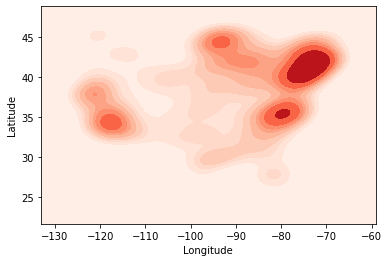

In [83]:
# g = sns.jointplot(x = plantloc_df['Longitude'], y = plantloc_df['Latitude'],
#                   s=10, alpha=0.4, facecolors='none', edgecolor='b')

cmap = "Reds"
shade = True
thresh = 0

df_thres = df_merge[df_merge['YEAR'] == 2020]
df_thres = df_thres[df_thres['Latitude'] < 46]
df_thres = df_thres[df_thres['Latitude'] > 24]
df_thres = df_thres[df_thres['Longitude'] > -123]
df_thres = df_thres[df_thres['Longitude'] < -69]


g = sns.kdeplot(x = df_thres['Longitude'], y = df_thres['Latitude'], cmap=cmap, shade=shade, thresh=thresh, data=df_thres)

In [32]:
df_thres = df_merge[df_merge['YEAR'] == 2020]
df_thres = df_thres[df_thres['State_x'] == 'IN']

baseIN = alt.Chart(gdf).mark_geoshape(
    fill='lightgray',
    stroke='white'
)

chart = alt.Chart(df_thres).mark_rect().encode(
    alt.X('Longitude:Q', bin=alt.Bin(maxbins=18)),
    alt.Y('Latitude:Q', bin=alt.Bin(maxbins=20)),
    alt.Color('count():Q', scale=alt.Scale(scheme='viridis'))
).project(
    type='albersUsa'
).properties(
    width=360,
    height=600
)

baseIN + chart

alt.LayerChart(...)

In [34]:
states = gpd.read_file(
    gplt.datasets.get_path('contiguous_usa')
)



NameError: ignored

In [ ]:
power_tidy_df = pd.melt(df_merge, id_vars=['religion'], 
                      value_vars=['<$10k',
                                  '$10-20k',
                                  '$20-30k',
                                  '$30-40k',
                                  '$40-50k',
                                  '$50-75k',
                                  '$75-100k',
                                  '$100-150k',
                                  '>150k',
                                  'Don\'t know/refused'], 
                      var_name='income', 
                      value_name='month')
# pew_tidy_df
power_df.dtype
years = sorted(df_merge['YEAR'].unique())

'Netgen_Jan'
,'Netgen_Feb'
,'Netgen_Mar'
,'Netgen_Apr'
,'Netgen_May'
,'Netgen_Jun'
,'Netgen_Jul'
,'Netgen_Aug'
,'Netgen_Sep'
,'Netgen_Oct'
,'Netgen_Nov'
,'Netgen_Dec'
,'Net Generation (Megawatthours)'



In [35]:
sourceStates

,state,state_x,ratio,year,totalPercent,meanlat,meanlon,id,state_y
0,AK,AK,0.193496,2011.0,6.853178e+06,61.365373,-149.235397,2,Alaska
51,AK,AK,0.223270,2012.0,6.928294e+06,61.365373,-149.235397,2,Alaska
102,AK,AK,0.239309,2013.0,6.497079e+06,61.365373,-149.235397,2,Alaska
153,AK,AK,0.274159,2014.0,6.045143e+06,61.365373,-149.235397,2,Alaska
204,AK,AK,0.270796,2015.0,6.270285e+06,61.365373,-149.235397,2,Alaska
...,...,...,...,...,...,...,...,...,...
305,WY,WY,0.114959,2016.0,4.664974e+07,42.755527,-107.221116,56,Wyoming
356,WY,WY,0.116497,2017.0,4.673337e+07,42.755527,-107.221116,56,Wyoming
407,WY,WY,0.109177,2018.0,4.610587e+07,42.755527,-107.221116,56,Wyoming
458,WY,WY,0.126594,2019.0,4.214566e+07,42.755527,-107.221116,56,Wyoming


In [42]:
def cartocharto(src, x):
    states = alt.topo_feature(data.us_10m.url, feature='states')
    background = alt.Chart(states).mark_geoshape(
        fill='lightgray',
        stroke='white'
    ).properties(
        width=300,
        height=180
    ).project('albersUsa')

    pts = alt.Chart(src, title=x).mark_circle(
        ).encode(
        latitude='meanlat:Q',
        longitude='meanlon:Q',
        size=alt.Size('totalPercent:Q', scale=alt.Scale(domain=[0,400000000]), title='Net Generation (Megawatthours)'),
        tooltip=[alt.Tooltip('state_y', title='State'), alt.Tooltip('totalPercent', title='Yearly Net Generation (MW)'), 'ratio'],
        color=alt.Color('ratio:Q', scale=alt.Scale(domain=[0,1],scheme='viridis'), title='Percent Carbon-Free Energy')
    )

    chart = background + pts

    return chart

src1 = sourceStates[sourceStates['year'] == 2011]


In [43]:
frme = sourceStates[sourceStates['year'] == 2019]

charto = cartocharto(frme, str(2020))
charto

alt.LayerChart(...)

In [45]:
!pip install altair_saver
!pip install selenium
!apt-get install chromium-chromedriver
from altair_saver import save
alt.renderers.enable('altair_saver', fmts=['vega-lite', 'png'])

yrs = sourceStates['year'].unique()
for i in yrs:

      frme = sourceStates[sourceStates['year'] == i]
      charto = cartocharto(frme, str(int(i)))
      stringer = str(int(i)) + 'carto' + '.png'
      save(charto, stringer, scale_factor=4.0)



Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (95.0.4638.69-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
